In [2]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#df = pd.read_csv('/Users/dunyenghuh/Desktop/Kaggle/Heart Disease Classification/train.csv')
df = pd.read_csv('C:/Users/Michael/Downloads/secret file for dunyeng/heart_disease/train.csv')
print(df.shape)
df.head()

#age, #sex, #chest pain type (4 values) #resting blood pressure #serum cholestoral in mg/dl #fasting blood sugar > 120 mg/dl
#resting electrocardiographic results (values 0,1,2) #maximum heart rate achieved #exercise induced angina
#oldpeak = ST depression induced by exercise relative to rest #the slope of the peak exercise ST segment
#number of major vessels (0-3) colored by flourosopy #thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isnull().sum() / len(df)
print("no missing data")

no missing data


## Exploratory Analysis

In [58]:
df.corr().target.sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

C:\Users\Michael\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

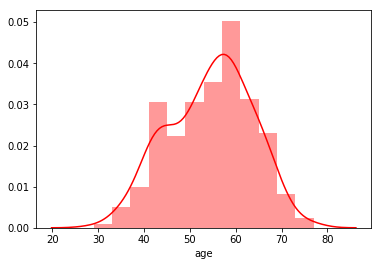

In [4]:
sns.distplot( df.age, color = 'r')
df.age.describe()

In [5]:
print(df.sex.sum() / len(df.sex), "% of them are male")
df.sex.value_counts()

0.6831683168316832 % of them are male


1    207
0     96
Name: sex, dtype: int64

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

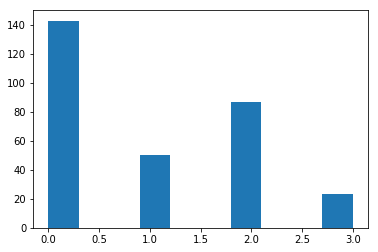

In [6]:
plt.hist(df.cp)
df.cp.value_counts()

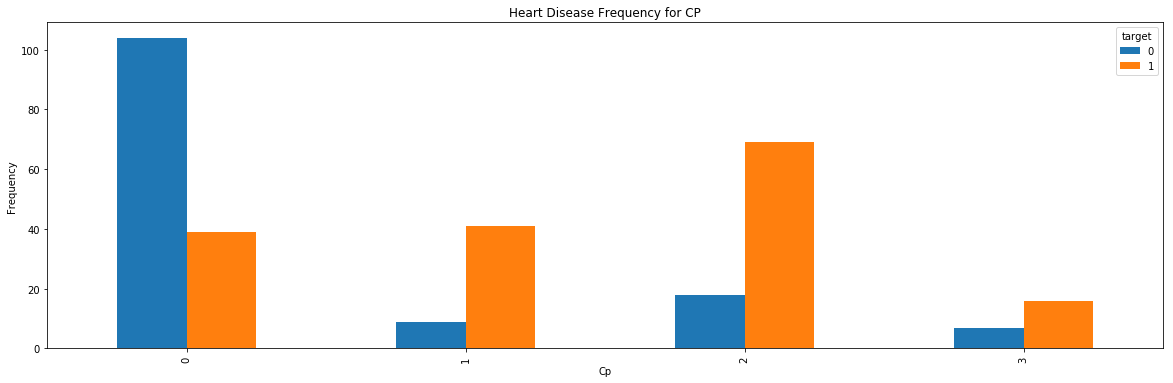

In [94]:
#reference : https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for CP')
plt.xlabel('Cp')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndCP.png')
plt.show()

the blood pressure is skewed to the right


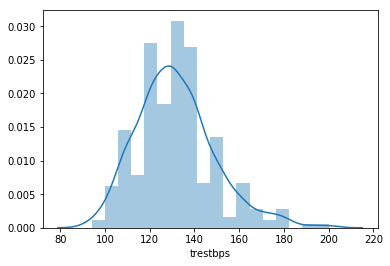

In [7]:
sns.distplot(df.trestbps)
print("the blood pressure is skewed to the right")

the blood pressure is skewed to the right


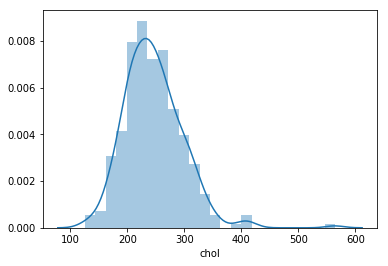

In [8]:
sns.distplot(df.chol)
print("the blood pressure is skewed to the right")

0.1485148514851485 % of patients have fasting blood sugar level


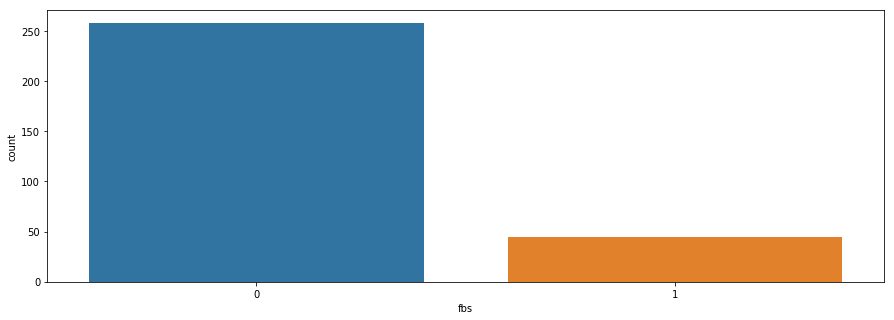

In [85]:
sns.countplot(df.fbs)
print(df.fbs.sum() / len(df.fbs), '% of patients have fasting blood sugar level')

almost half and half


1    152
0    147
2      4
Name: restecg, dtype: int64

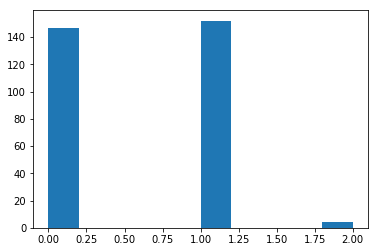

In [32]:
plt.hist(df.restecg)
print("almost half and half")
df.restecg.value_counts()


maximum heartrate archived
skewed to the left


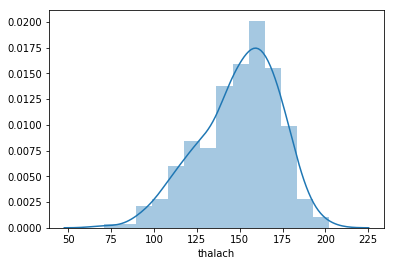

In [31]:
sns.distplot(df.thalach)
print("maximum heartrate archived")
print("skewed to the left")

almost 33% has exercise induced angina


0    204
1     99
Name: exang, dtype: int64

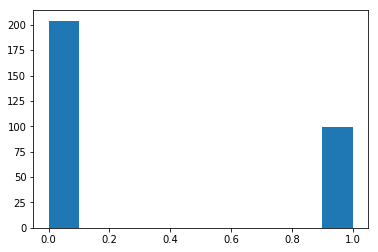

In [12]:
plt.hist(df.exang)
print('almost 33% has exercise induced angina' )
df.exang.value_counts()


oldpeak = ST depression induced by exercise relative to rest
skewed to the right


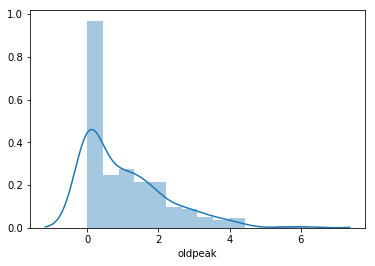

In [30]:
sns.distplot(df.oldpeak)
print("oldpeak = ST depression induced by exercise relative to rest")
print("skewed to the right")

the slope of the peak exercise ST segment


2    142
1    140
0     21
Name: slope, dtype: int64

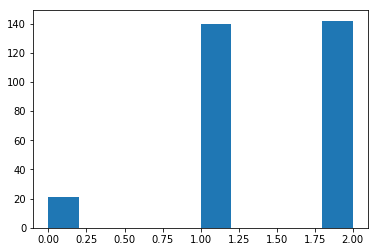

In [29]:
plt.hist(df.slope)
print('the slope of the peak exercise ST segment' )
df.slope.value_counts()


number of major vessels (0-3) colored by flourosopy


0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

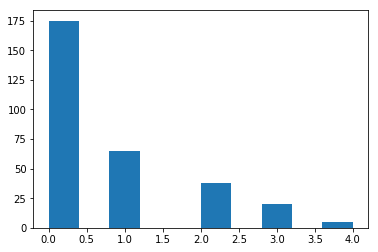

In [28]:

plt.hist(df.ca)
print('number of major vessels (0-3) colored by flourosopy' )
df.ca.value_counts()

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


2    166
3    117
1     18
0      2
Name: thal, dtype: int64

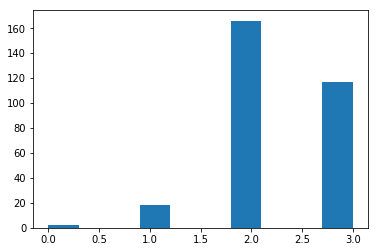

In [27]:
plt.hist(df.thal)
print('thal: 3 = normal; 6 = fixed defect; 7 = reversable defect' )
df.thal.value_counts()

almost 


1    165
0    138
Name: target, dtype: int64

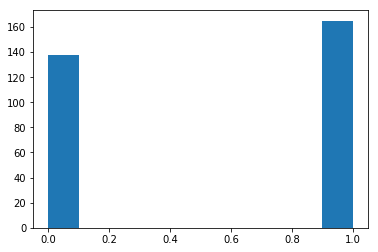

In [26]:
plt.hist(df.target)
print('almost ' )
df.target.value_counts()

## Model Construction 

In [35]:
from sklearn.ensemble import RandomForestClassifier

y =  df.target
df2 = df.drop(columns = 'target')

train_x, test_x, train_y, test_y = train_test_split(df2, y)


In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

classifier = MultinomialNB()
classifier.fit(train_x, train_y)
print(classifier.score(train_x,train_y))
pred = classifier.predict(test_x)
print(accuracy_score(test_y, pred))


0.7444933920704846
0.8026315789473685


In [91]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

classifier.fit(train_x, train_y)
print(classifier.score(train_x,train_y))
pred = classifier.predict(test_x)
print(accuracy_score(test_y, pred))

0.8502202643171806
0.7894736842105263


In [93]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

classifier.fit(train_x, train_y)
print(classifier.score(train_x,train_y))
pred = classifier.predict(test_x)
print(accuracy_score(test_y, pred))

1.0
0.7105263157894737


In [69]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 105)
classifier.fit(train_x, train_y)
print(classifier.score(test_x, test_y))
pred = classifier.predict(test_x)
print(accuracy_score(test_y, pred))


0.6973684210526315
0.6973684210526315


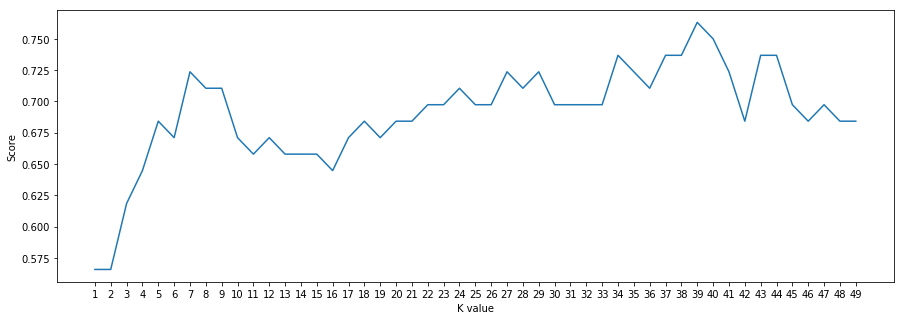

Maximum KNN Score is 76.32%


In [89]:
scoreList = []
for i in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(train_x, train_y)
    scoreList.append(knn2.score(test_x, test_y))
    
plt.plot(range(1,50), scoreList)
plt.xticks(np.arange(1,50,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

In [90]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(train_x, train_y)
print(svm.score(train_x,train_y))
acc = svm.score(test_x,test_y)*100
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

1.0
Test Accuracy of SVM Algorithm: 60.53%


C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [74]:
print("RandomForest yeilds best results")
classifier = RandomForestClassifier(n_estimators = 25, max_depth =90)
classifier.fit(train_x, train_y)
print(classifier.score(train_x,train_y))
pred = classifier.predict(test_x)
print(accuracy_score(test_y, pred))

RandomForest yeilds best results
0.9955947136563876
0.8289473684210527


              precision    recall  f1-score   support

           0       0.80      0.77      0.79        31
           1       0.85      0.87      0.86        45

   micro avg       0.83      0.83      0.83        76
   macro avg       0.82      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



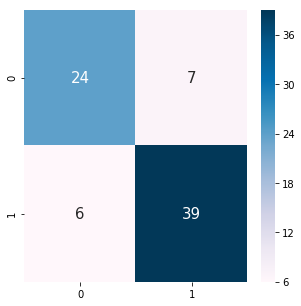

In [79]:
# cofusion matrix
cm = confusion_matrix(test_y, pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(test_y, pred)
print(cr)

In [80]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8
Specificity :  0.8478260869565217


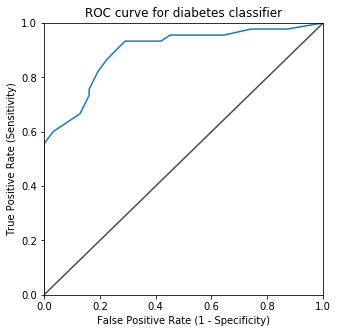

In [82]:
from sklearn.metrics import roc_curve

y_pred_quant = classifier.predict_proba(test_x)[:, 1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()


In [83]:
# let's check the auc score

from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

AUC Score : 0.8964157706093191
